<h2> 1. Data Cleaning

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Reading of both training and testing file
df = pd.read_csv('train.csv', low_memory=False)
test_df = pd.read_csv('test.csv', low_memory=False)

Train.csv will be the dataset we use to perform train-test-split for our prediction model. <br>

Test.csv will be the "unseen" data we use to test our prediction model. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

There are 78 columns and 150634 rows in the train dataset.

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 77 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         16737 non-null  int64  
 1   Tranc_YearMonth            16737 non-null  object 
 2   town                       16737 non-null  object 
 3   flat_type                  16737 non-null  object 
 4   block                      16737 non-null  object 
 5   street_name                16737 non-null  object 
 6   storey_range               16737 non-null  object 
 7   floor_area_sqm             16737 non-null  float64
 8   flat_model                 16737 non-null  object 
 9   lease_commence_date        16737 non-null  int64  
 10  Tranc_Year                 16737 non-null  int64  
 11  Tranc_Month                16737 non-null  int64  
 12  mid_storey                 16737 non-null  int64  
 13  lower                      16737 non-null  int

There are 77 columns and 16737 rows in the test dataset, one less column than the train dataset because the 'resale price' column is missing.

In [5]:
dfcheck = pd.DataFrame(df.isna().sum())
dfcheck[0].sort_values(ascending=False).head(20)

Hawker_Within_500m         97390
Mall_Within_500m           92789
Hawker_Within_1km          60868
Hawker_Within_2km          29202
Mall_Within_1km            25426
Mall_Within_2km             1940
Mall_Nearest_Distance        829
Hawker_Nearest_Distance        0
mrt_nearest_distance           0
hawker_market_stalls           0
hawker_food_stalls             0
id                             0
bus_interchange                0
planning_area                  0
Longitude                      0
Latitude                       0
postal                         0
other_room_rental              0
mrt_name                       0
mrt_interchange                0
Name: 0, dtype: int64

In [6]:
testdfcheck = pd.DataFrame(test_df.isna().sum())
testdfcheck[0].sort_values(ascending=False).head(20)

Hawker_Within_500m         10755
Mall_Within_500m           10292
Hawker_Within_1km           6729
Hawker_Within_2km           3254
Mall_Within_1km             2786
Mall_Within_2km              213
Mall_Nearest_Distance         84
mrt_name                       0
mrt_nearest_distance           0
hawker_market_stalls           0
hawker_food_stalls             0
id                             0
Hawker_Nearest_Distance        0
3room_rental                   0
planning_area                  0
Longitude                      0
Latitude                       0
postal                         0
bus_interchange                0
mrt_interchange                0
Name: 0, dtype: int64

There are multiple columns with null values for both the train and test datasets.

In [7]:
df[['Hawker_Within_500m','Mall_Within_500m','Hawker_Within_1km','Hawker_Within_2km','Mall_Within_1km','Mall_Within_2km']] = df[['Hawker_Within_500m','Mall_Within_500m','Hawker_Within_1km','Hawker_Within_2km','Mall_Within_1km','Mall_Within_2km']].fillna(0)

dfcheck = pd.DataFrame(df.isna().sum())
dfcheck[0].sort_values(ascending=False).head(20)

Mall_Nearest_Distance      829
id                           0
Mall_Within_2km              0
mrt_nearest_distance         0
hawker_market_stalls         0
hawker_food_stalls           0
Hawker_Within_2km            0
Hawker_Within_1km            0
Hawker_Within_500m           0
Hawker_Nearest_Distance      0
Mall_Within_1km              0
bus_interchange              0
Mall_Within_500m             0
planning_area                0
Longitude                    0
Latitude                     0
postal                       0
other_room_rental            0
mrt_name                     0
mrt_interchange              0
Name: 0, dtype: int64

In [8]:
test_df[['Hawker_Within_500m','Mall_Within_500m','Hawker_Within_1km','Hawker_Within_2km','Mall_Within_1km','Mall_Within_2km']] = test_df[['Hawker_Within_500m','Mall_Within_500m','Hawker_Within_1km','Hawker_Within_2km','Mall_Within_1km','Mall_Within_2km']].fillna(0)

testdfcheck = pd.DataFrame(test_df.isna().sum())
testdfcheck[0].sort_values(ascending=False).head(20)

Mall_Nearest_Distance      84
id                          0
Hawker_Nearest_Distance     0
mrt_name                    0
mrt_nearest_distance        0
hawker_market_stalls        0
hawker_food_stalls          0
Hawker_Within_2km           0
Hawker_Within_1km           0
Hawker_Within_500m          0
Mall_Within_2km             0
3room_rental                0
Mall_Within_1km             0
Mall_Within_500m            0
planning_area               0
Longitude                   0
Latitude                    0
postal                      0
bus_interchange             0
mrt_interchange             0
Name: 0, dtype: int64

For all columns except 'Mall Nearest Distance' column, null values were filled in with '0' value.

In [9]:
df['Mall_Nearest_Distance'] = df['Mall_Nearest_Distance'].fillna('No Mall')
df[df['Mall_Nearest_Distance'] == 'No Mall']['Mall_Nearest_Distance'].count()


829

In [10]:
test_df['Mall_Nearest_Distance'] = test_df['Mall_Nearest_Distance'].fillna('No Mall')
test_df[test_df['Mall_Nearest_Distance'] == 'No Mall']['Mall_Nearest_Distance'].count()

84

For the 'Mall Nearest Distance' column, null values were filled in with 'No Mall' string.

In [11]:
df.columns = df.columns.str.lower()
test_df.columns = test_df.columns.str.lower()

All column names were changed to lower caps.

In [12]:
df['price_check'] = df['floor_area_sqft'] * df['price_per_sqft']
df[df['price_check'] != df['resale_price']][['price_check','resale_price']] # Filters the dataframes to show only the rows where price_check value is NOT equal to resale_price.

,price_check,resale_price
8,700000.0,700000.0
11,270000.0,270000.0
13,770000.0,770000.0
14,345000.0,345000.0
19,455000.0,455000.0
...,...,...
150620,450000.0,450000.0
150625,715000.0,715000.0
150627,385000.0,385000.0
150628,555000.0,555000.0


Created a calculated resale price column called 'price check' to check if 'resale price' was correctly calculated. <br>

Comparing the 2 columns returned 58479 rows with different results.

In [13]:
df['price_check'] = df['price_check'].round(0)
df['resale_price'] = df['resale_price'].round(0)
df[df['price_check'] != df['resale_price']][['price_check','resale_price']]

,price_check,resale_price


The reason why calculated resale price was not equal to resale price was due to rounding errors, not calculation errors. No need for any cleaning.

In [14]:
print(df.duplicated(subset=['id']).value_counts())
print(test_df.duplicated(subset=['id']).value_counts())

False    150634
Name: count, dtype: int64
False    16737
Name: count, dtype: int64


No duplicate rows were found using 'id' column as the unique identifier.

In [15]:
df.dtypes

id                     int64
tranc_yearmonth       object
town                  object
flat_type             object
block                 object
                      ...   
cutoff_point           int64
affiliation            int64
sec_sch_latitude     float64
sec_sch_longitude    float64
price_check          float64
Length: 79, dtype: object

In [16]:
test_df.dtypes

id                     int64
tranc_yearmonth       object
town                  object
flat_type             object
block                 object
                      ...   
sec_sch_name          object
cutoff_point           int64
affiliation            int64
sec_sch_latitude     float64
sec_sch_longitude    float64
Length: 77, dtype: object

In [17]:
# Changing to datetime dtype
df['tranc_yearmonth'] = pd.to_datetime(df['tranc_yearmonth'], format='%Y-%m')
test_df['tranc_yearmonth'] = pd.to_datetime(test_df['tranc_yearmonth'], format='%Y-%m')

Converted date column to datetime datatype.

In [18]:
df.drop(['block','street_name','storey_range','floor_area_sqm','mid_storey','hdb_age','address','postal','planning_area','bus_stop_name','price_check'],axis=1,inplace=True)
test_df.drop(['block','street_name','storey_range','floor_area_sqm','mid_storey','hdb_age','address','postal','planning_area','bus_stop_name'],axis=1,inplace=True)

Dropped all columns which were not necessary for data analysis or prediction modelling.

In [19]:
df.columns

Index(['id', 'tranc_yearmonth', 'town', 'flat_type', 'flat_model',
       'lease_commence_date', 'resale_price', 'tranc_year', 'tranc_month',
       'lower', 'upper', 'mid', 'full_flat_type', 'floor_area_sqft',
       'price_per_sqft', 'max_floor_lvl', 'year_completed', 'residential',
       'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'latitude', 'longitude', 'mall_nearest_distance',
       'mall_within_500m', 'mall_within_1km', 'mall_within_2km',
       'hawker_nearest_distance', 'hawker_within_500m', 'hawker_within_1km',
       'hawker_within_2km', 'hawker_food_stalls', 'hawker_market_stalls',
       'mrt_nearest_distance', 'mrt_name', 'bus_interchange',
       'mrt_interchange', 'mrt_latitude', 'mrt_longitude',

In [20]:
df.columns = df.columns.str.replace('sold','flat')
df.columns

Index(['id', 'tranc_yearmonth', 'town', 'flat_type', 'flat_model',
       'lease_commence_date', 'resale_price', 'tranc_year', 'tranc_month',
       'lower', 'upper', 'mid', 'full_flat_type', 'floor_area_sqft',
       'price_per_sqft', 'max_floor_lvl', 'year_completed', 'residential',
       'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_flat', '2room_flat',
       '3room_flat', '4room_flat', '5room_flat', 'exec_flat', 'multigen_flat',
       'studio_apartment_flat', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'latitude', 'longitude', 'mall_nearest_distance',
       'mall_within_500m', 'mall_within_1km', 'mall_within_2km',
       'hawker_nearest_distance', 'hawker_within_500m', 'hawker_within_1km',
       'hawker_within_2km', 'hawker_food_stalls', 'hawker_market_stalls',
       'mrt_nearest_distance', 'mrt_name', 'bus_interchange',
       'mrt_interchange', 'mrt_latitude', 'mrt_longitude',

In [21]:
test_df.columns

Index(['id', 'tranc_yearmonth', 'town', 'flat_type', 'flat_model',
       'lease_commence_date', 'tranc_year', 'tranc_month', 'lower', 'upper',
       'mid', 'full_flat_type', 'floor_area_sqft', 'price_per_sqft',
       'max_floor_lvl', 'year_completed', 'residential', 'commercial',
       'market_hawker', 'multistorey_carpark', 'precinct_pavilion',
       'total_dwelling_units', '1room_sold', '2room_sold', '3room_sold',
       '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'latitude', 'longitude', 'mall_nearest_distance',
       'mall_within_500m', 'mall_within_1km', 'mall_within_2km',
       'hawker_nearest_distance', 'hawker_within_500m', 'hawker_within_1km',
       'hawker_within_2km', 'hawker_food_stalls', 'hawker_market_stalls',
       'mrt_nearest_distance', 'mrt_name', 'bus_interchange',
       'mrt_interchange', 'mrt_latitude', 'mrt_longitude',
       'bus_sto

In [22]:
test_df.columns = test_df.columns.str.replace('sold','flat')
test_df.columns

Index(['id', 'tranc_yearmonth', 'town', 'flat_type', 'flat_model',
       'lease_commence_date', 'tranc_year', 'tranc_month', 'lower', 'upper',
       'mid', 'full_flat_type', 'floor_area_sqft', 'price_per_sqft',
       'max_floor_lvl', 'year_completed', 'residential', 'commercial',
       'market_hawker', 'multistorey_carpark', 'precinct_pavilion',
       'total_dwelling_units', '1room_flat', '2room_flat', '3room_flat',
       '4room_flat', '5room_flat', 'exec_flat', 'multigen_flat',
       'studio_apartment_flat', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'latitude', 'longitude', 'mall_nearest_distance',
       'mall_within_500m', 'mall_within_1km', 'mall_within_2km',
       'hawker_nearest_distance', 'hawker_within_500m', 'hawker_within_1km',
       'hawker_within_2km', 'hawker_food_stalls', 'hawker_market_stalls',
       'mrt_nearest_distance', 'mrt_name', 'bus_interchange',
       'mrt_interchange', 'mrt_latitude', 'mrt_longitude',
       'bus_sto

Renamed columns '1room_sold', '2room_sold' ... to '1room_flat', '2room_flat'...

In [23]:
test_df['resale_price'] = test_df['floor_area_sqft'] * test_df['price_per_sqft']

Created new ouput column 'resale_price' for the test dataset by multiplying floor_area_sqft with price_per_sqft.

In [24]:
df['age_sold'] = df['tranc_year'] - df['lease_commence_date']
test_df['age_sold'] = test_df['tranc_year'] - test_df['lease_commence_date']

Created new column to calculate hdb age as the no. of years from lease commencement date to the year of transaction. <br>

The column 'hdb age' which was dropped calculated the no. of years from lease commencement date to the year 2021, which was not useful for our prediction of resale price at the transaction year.

<h2> 2. Exploratory Data Analysis

In [25]:
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [26]:
df.head()

,id,tranc_yearmonth,town,flat_type,flat_model,lease_commence_date,resale_price,tranc_year,tranc_month,lower,upper,mid,full_flat_type,floor_area_sqft,price_per_sqft,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_flat,2room_flat,3room_flat,4room_flat,5room_flat,exec_flat,multigen_flat,studio_apartment_flat,1room_rental,2room_rental,3room_rental,other_room_rental,latitude,longitude,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,age_sold
0,88471,2016-05-01,KALLANG/WHAMPOA,4 ROOM,Model A,2006,680000.0,2016,5,10,12,11,4 ROOM Model A,968.760,701.928238,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,1.314299,103.872828,1094.090418,0.0,0.0,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504,10
1,122598,2012-07-01,BISHAN,5 ROOM,Improved,1987,665000.0,2012,7,7,9,8,5 ROOM Improved,1399.320,475.230826,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,1.346086,103.855078,866.941448,0.0,1.0,3.0,640.151925,0.0,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892,25
2,170897,2013-07-01,BUKIT BATOK,EXECUTIVE,Apartment,1997,838000.0,2013,7,13,15,14,EXECUTIVE Apartment,1550.016,540.639580,16,1996,Y,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,1.343867,103.760535,1459.579948,0.0,0.0,4.0,1762.082341,0.0,0.0,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013,16
3,86070,2012-04-01,BISHAN,4 ROOM,Model A,1992,550000.0,2012,4,1,5,3,4 ROOM Model A,1108.692,496.080066,11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,1.358245,103.845504,950.175199,0.0,1.0,4.0,726.215262,0.0,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934,20
4,153632,2017-12-01,YISHUN,4 ROOM,Simplified,1987,298000.0,2017,12,1,3,2,4 ROOM Simplified,893.412,333.552717,4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,1.414745,103.835532,729.771895,0.0,1.0,2.0,1540.151439,0.0,0.0,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335,30


In [27]:
df.shape

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

There are 150634 rows and 69 columns.


In [28]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,id,tranc_yearmonth,lease_commence_date,resale_price,tranc_year,tranc_month,lower,upper,mid,floor_area_sqft,price_per_sqft,max_floor_lvl,year_completed,total_dwelling_units,1room_flat,2room_flat,3room_flat,4room_flat,5room_flat,exec_flat,multigen_flat,studio_apartment_flat,1room_rental,2room_rental,3room_rental,other_room_rental,latitude,longitude,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,age_sold
count,"150,634.00",150634,"150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00"
mean,"93,047.89",2016-12-14 08:10:49.670061056,"1,992.45","449,161.50","2,016.49",6.58,7.25,9.32,8.28,"1,046.24",434.13,15.14,"1,990.92",124.68,0.14,1.78,39.22,50.08,26.30,5.94,0.02,0.45,0.06,0.62,0.06,0.00,1.37,103.84,0.49,1.79,5.17,"1,173.70",0.49,1.41,3.79,48.65,58.14,765.01,0.55,0.26,1.37,103.84,115.26,1.37,103.84,395.17,55.37,0.11,1.37,103.84,508.53,210.15,0.03,1.37,103.84,24.04
min,1.00,2012-03-01 00:00:00,"1,966.00","150,000.00","2,012.00",1.00,1.00,3.00,2.00,333.68,205.11,2.00,"1,949.00",2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.27,103.69,0.00,0.00,0.00,1.87,0.00,0.00,0.00,0.00,0.00,21.97,0.00,0.00,1.27,103.70,9.00,1.27,103.68,45.67,20.00,0.00,1.27,103.69,38.91,188.00,0.00,1.28,103.69,1.00
25%,"46,469.25",2014-08-01 00:00:00,"1,984.00","347,000.00","2,014.00",4.00,4.00,6.00,5.00,807.30,364.97,12.00,"1,983.00",90.00,0.00,0.00,0.00,14.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.34,103.77,0.00,1.00,3.00,372.13,0.00,0.00,1.00,40.00,0.00,458.27,0.00,0.00,1.34,103.77,75.03,1.34,103.77,227.08,44.00,0.00,1.34,103.77,290.29,188.00,0.00,1.34,103.78,15.00
50%,"93,077.50",2017-03-01 00:00:00,"1,992.00","420,000.00","2,017.00",7.00,7.00,9.00,8.00,"1,022.58",412.00,13.00,"1,989.00",112.00,0.00,0.00,0.00,44.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.36,103.84,0.00,2.00,5.00,778.97,0.00,1.00,2.00,43.00,52.00,682.62,1.00,0.00,1.36,103.85,107.77,1.36,103.84,348.88,54.00,0.00,1.36,103.84,447.38,208.00,0.00,1.37,103.84,25.00
75%,"139,574.75",2019-05-01 00:00:00,"2,001.00","520,000.00","2,019.00",9.00,10.00,12.00,11.00,"1,205.57",474.06,16.00,"1,999.00",144.00,0.00,0.00,66.00,73.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.39,103.90,1.00,3.00,6.00,"1,678.95",1.00,2.00,7.00,60.00,99.00,975.73,1.00,1.00,1.39,103.90,146.65,1.39,103.90,502.18,67.00,0.00,1.39,103.90,644.28,224.00,0.00,1.39,103.90,33.00
max,"185,966.00",2021-04-01 00:00:00,"2,019.00","1,258,000.00","2,021.00",12.00,49.00,51.00,50.00,"3,013.92","1,185.64",50.00,"2,018.00",570.00,255.00,225.00,528.00,316.00,164.00,135.00,66.00,142.00,110.00,452.00,24.00,2.00,1.46,103.99,6.00,15.00,43.00,"4,907.04",5.00,9.00,19.00,226.00,477.00,"3,544.50",1.00,1.00,1.45,103.99,443.96,1.46,103.99,"3,305.84",110.00,1.00,1.46,103.96,"3,638.98",260.00,1.00,1.45,103.96,54.00
std,"53,679.91",NaN,12.14,"143,307.57",2.75,3.35,5.52,5.51,5.51,262.67,104.80,6.23,12.20,58.35,5.95,11.71,68.75,45.30,33.46,19.13,1.14,5.35,2.03,11.19,0.67,0.02,0.04,

All floating-point numbers are displayed with thousands separators and rounded to 2dp.

<h3> 2.1. HDB resale prices and trends over time

In [29]:
df_ym_median = df.groupby(['tranc_yearmonth'])['resale_price'].median().reset_index() 
df_ym_median.rename(columns={'resale_price':'median_resale_price'},inplace=True)
df_ym_median

,tranc_yearmonth,median_resale_price
0,2012-03-01,"435,000.00"
1,2012-04-01,"435,000.00"
2,2012-05-01,"439,000.00"
3,2012-06-01,"448,000.00"
4,2012-07-01,"445,000.00"
...,...,...
105,2020-12-01,"452,000.00"
106,2021-01-01,"460,000.00"
107,2021-02-01,"460,000.00"
108,2021-03-01,"465,000.00"


Grouping by 'tranc_yearmonth and aggregating using median resale_price to create a variable which we can use to plot our graph. <br>

We will be using median resale_price in all our following analysis due to large std.

In [30]:
df_ym_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   tranc_yearmonth      110 non-null    datetime64[ns]
 1   median_resale_price  110 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [31]:
# Plot of median resale prices over year-month
fig = px.line(df_ym_median,
              x='tranc_yearmonth',
              y='median_resale_price',
              labels={'tranc_yearmonth': 'Resale Year', 'median_resale_price': 'Median Resale Price (SGD)'},
              width = 800
             )
fig.update_layout(title = {'text' : 'HDB Median Resale Prices Over Time', 'x' : 0.5, 'y' : 0.95, 'xanchor' : 'center'})
fig.show()

Prices were on a rising trend from mid-2012, peaking around late 2012/early 2013 at just over SGD 460k. <br>

Following this peak, there was a significant and relatively sharp decline throughout 2013 and 2014, with prices dropping consistently until mid-2015. <br>

From mid-2015 onwards, the market entered a period of relative stability, with median prices fluctuating largely within the SGD 400-420k range. <br>

Starting from around mid-2020, significant and rapid recovery pushed prices back to near-record highs by early 2021. This last trend aligns with the general market observations of a robust HDB resale market post-COVID-19.

In [32]:
df_month = df.groupby(['tranc_month'])['resale_price'].median().reset_index()
df_month.rename(columns={'resale_price':'median_resale_price'},inplace=True)
df_month

,tranc_month,median_resale_price
0,1,"424,044.00"
1,2,"420,000.00"
2,3,"426,888.00"
3,4,"425,000.00"
4,5,"420,000.00"
5,6,"417,500.00"
6,7,"420,000.00"
7,8,"420,000.00"
8,9,"420,000.00"
9,10,"420,000.00"


Grouping by 'tranc_month and aggregating using median resale_price to create a variable which we can use to plot our graph. <br>

In [33]:
# Plot of median resale prices over month
fig = px.bar(df_month,
              x='tranc_month',
              y='median_resale_price',
              labels={'tranc_month': 'Resale Month', 'median_resale_price': 'Median Resale Price (SGD)'},
              width = 800)
fig.update_layout(title = {'text' : 'HDB Median Resale Prices by Month', 'x' : 0.5, 'y' : 0.95, 'xanchor' : 'center'})
fig.show()

Sale prices are consistent across the months.

<h3> 2.2. Average transaction volume and frequency of HDB resale flat

In [34]:
tranc_town_year = df.groupby(['town'])['id'].count().reset_index()
tranc_town_year.columns = ['town','no_of_sales']
tranc_town_year = tranc_town_year.sort_values(by=['no_of_sales','town'], ascending=False)

Grouping by 'town first then 'tranc_month' and aggregating using count, and finally sorting by town followed by 'tranc_year' to create a variable which we can use to plot our graph.

In [35]:
# Plot of number of sales by town and year using a bar plot
fig = px.bar(tranc_town_year,
             x='town',
             y='no_of_sales',
             labels={'town': 'Town', 'no_of_sales': 'No. of Sales'},
             width = 800,
             height = 500)
fig.update_layout(title = {'text' : 'Number of Sales by Town', 'x' : 0.5, 'y' : 0.95, 'xanchor' : 'center'})
fig.show()

Transaction volume was highest in jurong west, woodlands, sengkang, tampines, and yishun which are towns in the Outside Central Region (OCR). <br>

Transaction volume was lowest in bishan, central area, marine parade, bukit timah, and serangoon which are towns in the Rest of Central Region (RCR) and Core Central Region (CCR).

<h3> 2.3. HDB Resale Prices by regions in Singapore

In [36]:
df['town'].nunique()

26

There are 26 different HDB towns in Singapore.

In [37]:
median_resale_town = df.groupby(['town'])['resale_price'].median().sort_values()

In [38]:
# Bar plot of Resale Price ($) VS Town
fig1 = px.bar(x = median_resale_town.index, 
              y = median_resale_town, 
              width = 800, 
              height = 500)
fig1.update_layout(title = {'text' : 'HDB Median Resale Price by Town', 'x' : 0.5, 'xanchor' : 'center'}, xaxis_title_text='Town', yaxis_title_text='Median Resale Price (SGD)')
fig1.update_traces(hovertemplate ='Town: %{x}<br>Resale Price: $%{y}<br><extra></extra>')
fig1.show()

Resale prices were lowest in yishun, ang mo kio, bukit batok, geylang, and bedok which are towns in the Outside Central Region (OCR). <br>

Resale prices were highest in bukit timah, bishan, bukit merah, queenstown, and central area which are towns in the Rest of Central Region (RCR) and Core Central Region (CCR).

<h3> 2.4. HDB Resale Prices by flat type

In [39]:
median_resale_flat_type = df.groupby(['flat_type'])['resale_price'].median().sort_values()

In [40]:
# Bar plot of Resale Price by Flat Type
fig2 = px.bar(x = median_resale_flat_type.index, 
              y = median_resale_flat_type, 
              width = 800, 
              height = 500)
fig2.update_layout(title = {'text' : 'Median Resale Price by Flat Type', 'x' : 0.5, 'xanchor' : 'center'}, xaxis_title_text='Flat Type', yaxis_title_text='Median Resale Price (SGD)')
fig2.update_traces(hovertemplate ='Flat Type: %{x}<br>Resale Price: S$%{y}<br><extra></extra>')
fig2.show()

The larger the size of the flat types, the higher the median resale price of the hdb unit.

In [41]:
median_resale_full_flat_type = df.groupby(['full_flat_type', 'flat_type'])['resale_price'].median().reset_index().sort_values(by = ['flat_type', 'resale_price'])

In [42]:
# Bar plot of Resale Price by Full Flat Type
fig3 = px.bar(median_resale_full_flat_type, 
              x = 'full_flat_type', 
              y = 'resale_price', 
              color = 'flat_type', 
              width = 1200, 
              height = 800)
fig3.update_layout(title = {'text' : 'HDB Median Resale Price by Full Flat Type', 'x' : 0.5, 'xanchor' : 'center'}, xaxis_title_text='Full Flat Type', yaxis_title_text='Median Resale Price (SGD)')
fig3.update_traces(hovertemplate ='Full Flat Type: %{x}<br>Resale Price: S$%{y}<br><extra></extra>')
fig3.show()

Median resale prices were highest for executive adjoined flats, 5 room type S2, 4 room type S1, 3 room terrace, and 2 room DBSS flat types.

In [43]:
top_5_town = ['BUKIT TIMAH', 'BISHAN', 'BUKIT MERAH', 'QUEENSTOWN', 'CENTRAL AREA']
median_resale_flat_type_top5town = df[df['town'].isin(top_5_town)].groupby(['flat_type', 'town'])['resale_price'].median().reset_index().sort_values(by = ['resale_price', 'flat_type'])
median_resale_flat_type_top5town.head()

,flat_type,town,resale_price
0,1 ROOM,BUKIT MERAH,"209,000.00"
3,2 ROOM,QUEENSTOWN,"256,000.00"
1,2 ROOM,BUKIT MERAH,"260,000.00"
2,2 ROOM,CENTRAL AREA,"274,000.00"
8,3 ROOM,QUEENSTOWN,"360,000.00"


In [44]:
# Bar plot of Resale Price ($) VS Full Flat Type in Top 5 Most Expensive Towns
fig4 = px.bar(median_resale_flat_type_top5town, 
              x = 'town', 
              y = 'resale_price', 
              color = 'flat_type', 
              barmode = 'group', 
              custom_data = 'flat_type', 
              width = 1200, 
              height = 800)
fig4.update_layout(title = {'text' : 'HDB Median Resale Price VS Flat Types in Top 5 Most Expensive Towns', 'x' : 0.5, 'xanchor' : 'center'}, 
                   xaxis_title_text='Town', 
                   yaxis_title_text='Median Resale Price (SGD)', 
                   bargap=0)
fig4.update_traces(hovertemplate ='Town: %{x}<br>Flat Type: %{customdata[0]}<br>Resale Price: S$%{y}<extra></extra>')
fig4.show()

<h2> 3. Feature Engineering

In [45]:
df.columns

Index(['id', 'tranc_yearmonth', 'town', 'flat_type', 'flat_model',
       'lease_commence_date', 'resale_price', 'tranc_year', 'tranc_month',
       'lower', 'upper', 'mid', 'full_flat_type', 'floor_area_sqft',
       'price_per_sqft', 'max_floor_lvl', 'year_completed', 'residential',
       'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_flat', '2room_flat',
       '3room_flat', '4room_flat', '5room_flat', 'exec_flat', 'multigen_flat',
       'studio_apartment_flat', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'latitude', 'longitude', 'mall_nearest_distance',
       'mall_within_500m', 'mall_within_1km', 'mall_within_2km',
       'hawker_nearest_distance', 'hawker_within_500m', 'hawker_within_1km',
       'hawker_within_2km', 'hawker_food_stalls', 'hawker_market_stalls',
       'mrt_nearest_distance', 'mrt_name', 'bus_interchange',
       'mrt_interchange', 'mrt_latitude', 'mrt_longitude',

In [46]:
selected_num_columns = [
    'resale_price',
    'floor_area_sqft',
    'age_sold',
    'mid',
    'mrt_nearest_distance',
    'mall_nearest_distance',
    'mall_within_2km',
    'hawker_nearest_distance',
    'hawker_within_2km',
    'bus_stop_nearest_distance',
    'pri_sch_nearest_distance',
    'sec_sch_nearest_dist',
    'vacancy',
    'cutoff_point',
    'bus_interchange',
    'mrt_interchange'
]

In [47]:
df_subset = df[selected_num_columns]
correlation_matrix = df_subset.corr(numeric_only=True)

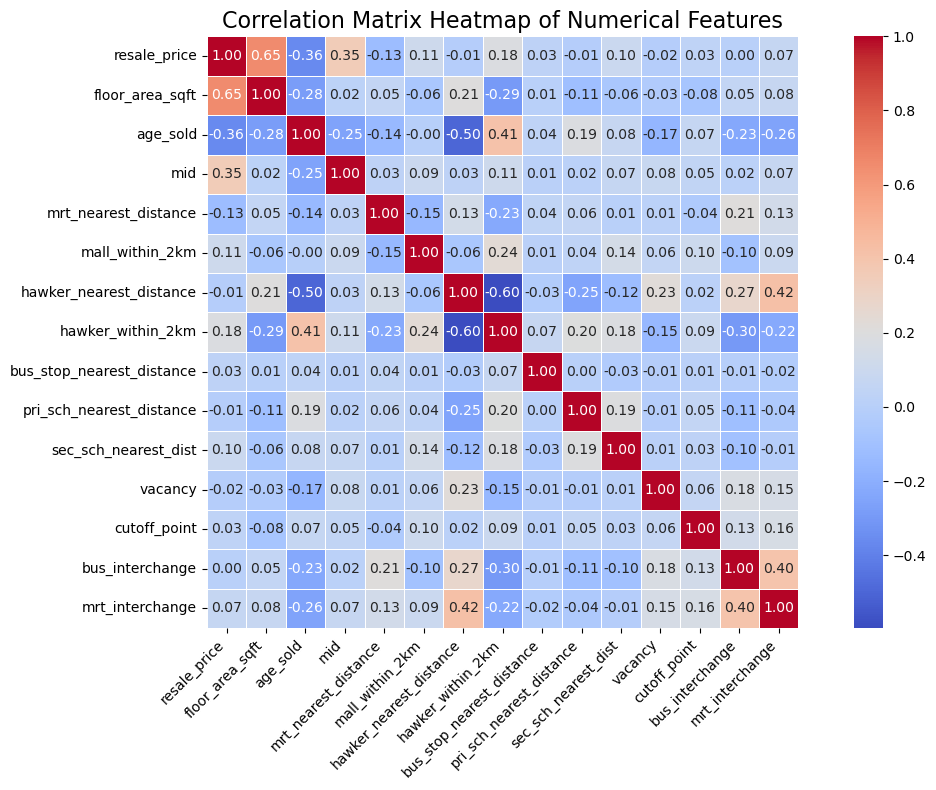

In [48]:
plt.figure(figsize=(12, 8))

sns.heatmap(
    correlation_matrix,
    annot=True,         
    cmap='coolwarm',   
    fmt=".2f",          
    linewidths=.5,      
    cbar=True,          
    square=True         
)

plt.title('Correlation Matrix Heatmap of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)             
plt.tight_layout()                 
plt.show()

Used correlation matrix to evaluate which numeric features were suitable to be used in our prediction model.

In [49]:
df.dtypes[df.dtypes =='object']

town                     object
flat_type                object
flat_model               object
full_flat_type           object
residential              object
commercial               object
market_hawker            object
multistorey_carpark      object
precinct_pavilion        object
mall_nearest_distance    object
mrt_name                 object
pri_sch_name             object
sec_sch_name             object
dtype: object

Deciding which categorical variables we intend to use for our prediction model.

In [50]:
flat_type_ordinal_map = {
    '1 ROOM': 0,
    '2 ROOM': 1,
    '3 ROOM': 2,
    '4 ROOM': 3,
    '5 ROOM': 4,
    'EXECUTIVE': 5,
    'MULTI-GENERATION': 6
}

df['flat_type_ordinal'] = df['flat_type'].map(flat_type_ordinal_map)

Performed ordinal mapping for flat types.

In [51]:
town_dummydf = pd.get_dummies(df['town'],prefix='town',drop_first=True)
town_dummydf

,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150629,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
150630,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
150631,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
150632,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [52]:
df_dummies = pd.concat([df,town_dummydf],axis=1)
df_dummies

,id,tranc_yearmonth,town,flat_type,flat_model,lease_commence_date,resale_price,tranc_year,tranc_month,lower,upper,mid,full_flat_type,floor_area_sqft,price_per_sqft,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_flat,2room_flat,3room_flat,4room_flat,5room_flat,exec_flat,multigen_flat,studio_apartment_flat,1room_rental,2room_rental,3room_rental,other_room_rental,latitude,longitude,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,age_sold,flat_type_ordinal,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
0,88471,2016-05-01,KALLANG/WHAMPOA,4 ROOM,Model A,2006,"680,000.00",2016,5,10,12,11,4 ROOM Model A,968.76,701.93,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,1.31,103.87,"1,094.09",0.00,0.00,7.00,154.75,1.00,3.00,13.00,84,60,330.08,Kallang,0,0,1.31,103.87,29.43,1.31,103.87,"1,138.63",Geylang Methodist School,78,1,1.32,103.88,"1,138.63",Geylang Methodist School,224,0,1.32,103.88,10,3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,122598,2012-07-01,BISHAN,5 ROOM,Improved,1987,"665,000.00",2012,7,7,9,8,5 ROOM Improved,"1,399.32",475.23,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,1.35,103.86,866.94,0.00,1.00,3.00,640.15,0.00,1.00,7.00,80,77,903.66,Bishan,1,1,1.35,103.85,58.21,1.35,103.86,415.61,Kuo Chuan Presbyterian Primary School,45,1,1.35,103.85,447.89,Kuo Chuan Presbyterian Secondary School,232,0,1.35,103.85,25,4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,170897,2013-07-01,BUKIT BATOK,EXECUTIVE,Apartment,1997,"838,000.00",2013,7,13,15,14,EXECUTIVE Apartment,"1,550.02",540.64,16,1996,Y,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,1.34,103.76,"1,459.58",0.00,0.00,4.00,"1,762.08",0.00,0.00,1.00,84,95,"1,334.25",Bukit Batok,1,0,1.35,103.75,214.75,1.34,103.76,498.85,Keming Primary School,39,0,1.35,103.76,180.07,Yusof Ishak Secondary School,188,0,1.34,103.76,16,5,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,86070,2012-04-01,BISHAN,4 ROOM,Model A,1992,"550,000.00",2012,4,1,5,3,4 ROOM Model A,"1,108.69",496.08,11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,1.36,103.85,950.18,0.00,1.00,4.00,726.22,0.00,1.00,9.00,32,86,907.45,Bishan,1,1,1.35,103.85,43.40,1.36,103.85,389.52,Catholic High School,20,1,1.35,103.84,389.52,Catholic High School,253,1,1.35,103.84,20,3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,153632,2017-12-01,YISHUN,4 ROOM,Simplified,1987,"298,000.00",2017,12,1,3,2,4 ROOM Simplified,893.41,333.55,4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,1.41,103.84,729.77,0.00,1.00,2.00,"1,540.15",0.00,0.00,1.00,45,0,412.34,Khatib,0,0,1.42,103.83,129.42,1.42,103.84,401.20,Naval Base Primary School,74,0,1.42,103.84,312.03,Orchid Park Secondary School,208,0,1.41,103.84,30,3,False,False,False,False,False,False,False,False,False,False,F

Performed one-hot encoding for towns and joined to our train dataset for further analysis. 

In [53]:
test_feature_cols = ['floor_area_sqft','age_sold','mid','hawker_within_2km','mrt_nearest_distance','flat_type_ordinal', 'tranc_year',
                'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK',
                'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH',
                'town_CENTRAL AREA', 'town_CHOA CHU KANG', 'town_CLEMENTI',
                'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST',
                'town_KALLANG/WHAMPOA', 'town_MARINE PARADE', 'town_PASIR RIS',
                'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG',
                'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS',
                'town_YISHUN','resale_price']

In [54]:
test_feature_corr = df_dummies[test_feature_cols].corr()

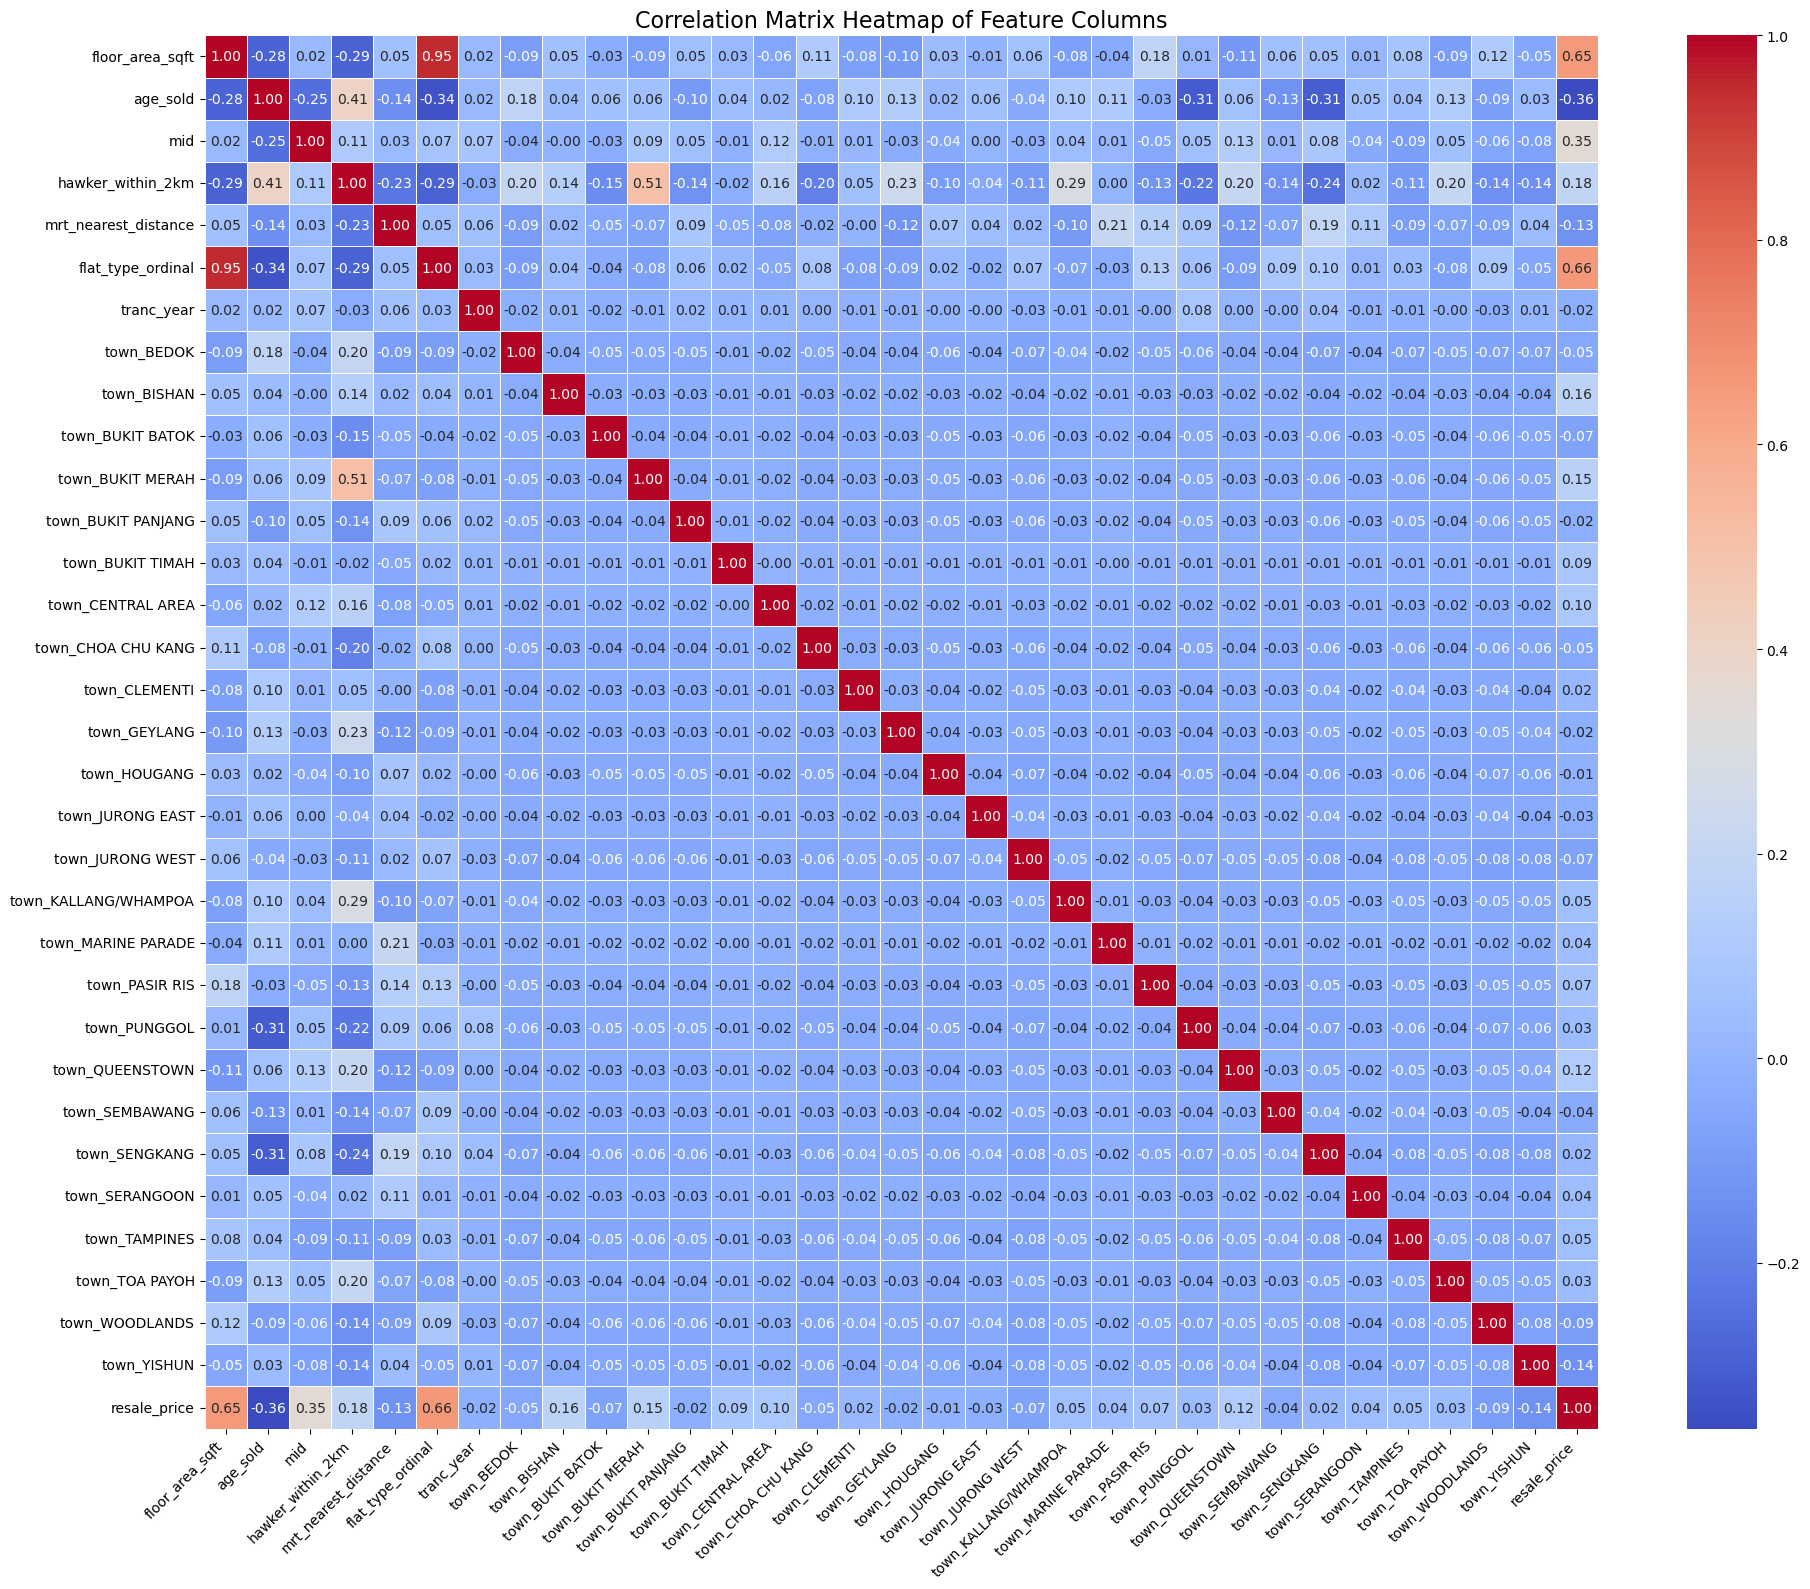

In [55]:
plt.figure(figsize=(20, 16))

sns.heatmap(
    test_feature_corr,
    annot=True,         
    cmap='coolwarm',   
    fmt=".2f",          
    linewidths=.5,      
    cbar=True,          
    square=True         
)

plt.title('Correlation Matrix Heatmap of Feature Columns', fontsize=16)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)             
plt.tight_layout()                 
plt.show()

In [56]:
df_dummies = df_dummies.drop('flat_type_ordinal',axis=1)

As floor area and flat type has a high colinearity value of 0.95, we will only use floor_area_sqft for our model and drop flat_type_ordinal.

In [57]:
test_town_dummydf = pd.get_dummies(test_df['town'],prefix='town',drop_first=True)
test_df_dummies = pd.concat([test_df,test_town_dummydf],axis=1)
test_df_dummies

,id,tranc_yearmonth,town,flat_type,flat_model,lease_commence_date,tranc_year,tranc_month,lower,upper,mid,full_flat_type,floor_area_sqft,price_per_sqft,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_flat,2room_flat,3room_flat,4room_flat,5room_flat,exec_flat,multigen_flat,studio_apartment_flat,1room_rental,2room_rental,3room_rental,other_room_rental,latitude,longitude,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,resale_price,age_sold,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
0,114982,2012-11-01,YISHUN,4 ROOM,Simplified,1987,2012,11,7,9,8,4 ROOM Simplified,904.18,399.26,12,1986,Y,Y,N,N,N,132,0,0,0,92,40,0,0,0,0,0,0,0,1.44,103.83,877.43,0.00,2.00,4.00,687.58,0.00,1.00,1.00,56,123,686.66,Canberra,0,0,1.44,103.83,75.68,1.44,103.83,426.47,Ahmad Ibrahim Primary School,92,0,1.43,103.83,156.32,Ahmad Ibrahim Secondary School,218,0,1.44,103.83,"361,000.00",25,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,95653,2019-08-01,JURONG WEST,5 ROOM,Premium Apartment,2008,2019,8,4,6,5,5 ROOM Premium Apartment,"1,205.57",398.15,14,2002,Y,N,N,N,N,53,0,0,0,28,25,0,0,0,0,0,0,0,1.34,103.70,534.04,0.00,1.00,3.00,"2,122.35",0.00,0.00,0.00,72,94,169.48,Pioneer,0,0,1.34,103.70,88.99,1.34,103.70,439.76,Jurong West Primary School,45,0,1.34,103.70,739.37,Jurong West Secondary School,199,0,1.34,103.70,"480,000.00",11,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,40303,2013-10-01,ANG MO KIO,3 ROOM,New Generation,1980,2013,10,7,9,8,3 ROOM New Generation,731.95,479.39,12,1979,Y,N,N,N,N,218,0,0,191,22,1,1,0,0,0,0,3,0,1.37,103.85,817.05,0.00,2.00,3.00,152.29,1.00,3.00,11.00,50,100,694.22,Ang Mo Kio,1,0,1.37,103.85,86.30,1.37,103.85,355.88,Jing Shan Primary School,36,0,1.37,103.85,305.07,Anderson Secondary School,245,0,1.37,103.85,"350,888.00",33,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,109506,2017-10-01,WOODLANDS,4 ROOM,New Generation,1979,2017,10,1,3,2,4 ROOM New Generation,"1,044.11",306.48,14,1976,Y,N,N,N,N,104,0,0,0,104,0,0,0,0,0,0,0,0,1.44,103.77,"1,272.74",0.00,0.00,3.00,501.89,0.00,1.00,2.00,52,112,"1,117.20",Marsiling,0,0,1.43,103.77,108.46,1.44,103.77,929.74,Marsiling Primary School,54,0,1.43,103.77,433.45,Woodlands Secondary School,188,0,1.44,103.77,"320,000.00",38,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,100149,2016-08-01,BUKIT BATOK,4 ROOM,Model A,1985,2016,8,16,18,17,4 ROOM Model A,"1,108.69",360.78,25,1985,Y,N,N,N,N,144,0,0,0,48,96,0,0,0,0,0,0,0,1.35,103.74,"1,070.96",0.00,0.00,5.00,437.59,1.00,2.00,2.00,60,87,987.98,Chinese Garden,0,0,1.34,103.73,113.65,1.35,103.74,309.93,Princess Elizabeth Primary School,40,0,1.35,103.74,217.30,Bukit Batok Secondary School,223,0,1.35,103.74,"399,999.00",31,False,False,True,False,False,False

Performed the sane one-hot encoding for towns and joined to test dataset.

In [59]:
df_dummies.to_csv('./Clean EDA Exported files/df_dummies.csv',index=False)
test_df_dummies.to_csv('./Clean EDA Exported files/test_df_dummies.csv',index=False)

Exported both train and test added with one-hot encoded town features to csv files to be used in prediction models.